# Bangalore Housing Price Prediction
Project Overview

- Objective: To develop a machine learning model for predicting home prices based on input features such as location, no of bedrooms, no of bathrooms, square area feet and surge pricing.

- Tools and Technologies: Python, Pandas, Scikit-Learn, Matplotlib

Understanding the Dataset

- Dataset Name: banglore_home_price.csv

- Dataset Source: Kaggle

- My journey begins with understanding the dataset. The data comprises several columns, each representing a crucial aspect of a house:

- Location: The neighborhood or area where the house is located.

- Total Sq. Ft: The total square footage of the property.

- Bedrooms: The number of bedrooms in the house in Terms of BHK

- Bathrooms: The number of bathrooms in the house.

- Price: The target variable, which is the price of the house.

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

pd.options.display.max_columns = None
pd.set_option('display.max_rows', 500)
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (10,5)

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# UNDERSTANDING DATA

In [3]:
#Reading the data

housing = pd.read_csv("bengaluru_house_prices.csv")
housing.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [4]:
# Checking the shape
housing.shape

(13320, 9)

- We have 13320 rows and 9 columns in our dataframe

In [5]:
#Checking the features in the dataset

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


- There are 13320 samples and 9 features. There are few features with missing values.
- This DataFrame comprises 13,320 entries and includes nine columns providing diverse information about properties. The 'area_type' column categorizes the type of area each property falls under, while 'availability' denotes their status, such as being ready for occupancy or under construction. 'Location' specifies where the properties are situated, and 'size' indicates their dimensions, typically in terms of bedrooms, halls, and kitchens. The 'society' column identifies the community or housing society associated with each property. 'Total_sqft' quantifies the total square footage of the properties. Moving to numerical data, 'bath' signifies the number of bathrooms, 'balcony' denotes the count of balconies, and 'price' reflects the monetary value of each property. Among these columns, 'bath', 'balcony', and 'price' are of numeric type, while the others are of object type, often indicating categorical or textual data. Notably, several columns contain missing values, with 'society' having a substantial number of them, indicating potential data cleaning or imputation requirements for further analysis or modeling endeavors.

In [6]:
# Checking for summary startsitsic sof the data
housing.describe()

bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000

- The results of the describe() function provide valuable insights into the housing dataset. In the 'bath' column, which records the number of bathrooms in each property, there are 13,247 entries. On average, properties have approximately 2.69 bathrooms, with a standard deviation of around 1.34, suggesting a moderate level of variability in this feature. The range spans from a minimum of 1 bathroom to a maximum of 40 bathrooms, with the majority falling between 2 and 3 bathrooms, as indicated by the quartile values.

- Moving to the 'balcony' column, detailing the number of balconies in each property, there are 12,711 entries. The average number of balconies is approximately 1.58, with a standard deviation of about 0.82. The data ranges from a minimum of 0 balconies to a maximum of 3 balconies. Most properties have either 1 or 2 balconies, as suggested by the quartile values.

- Lastly, in the 'price' column, representing the price of each property, there are 13,320 entries. The average price is approximately 112.57, with a notable standard deviation of around 148.97, indicating a considerable spread in property prices. The prices range from a minimum of 8 to a maximum of 3600. The majority of prices fall within the range of 50 to 120, with half of the properties priced below 72.

- These statistical summaries offer a comprehensive overview of the dataset, shedding light on the distribution and central tendency of the key features related to housing.

# EXPLORATORY DATA ANALYSIS(EDA)

#### Univariate Analysis

<Axes: xlabel='area_type', ylabel='count'>

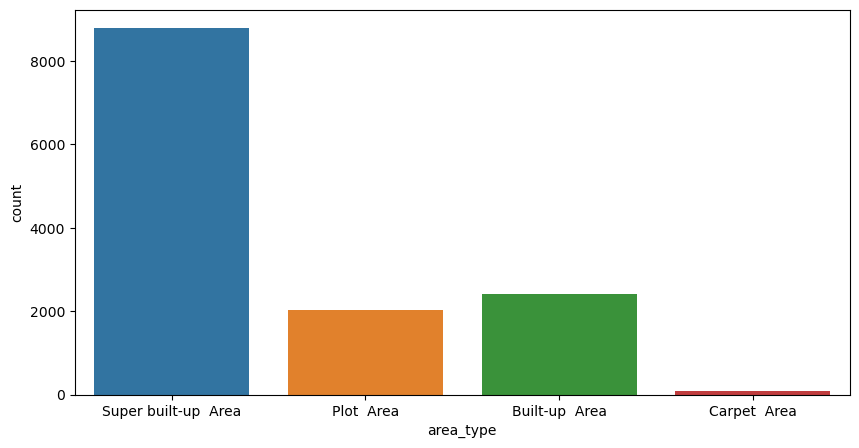

In [7]:
sns.countplot(x="area_type", data = housing)

- This clearly shows that many area type that has larges t count is the super built up areas  followed by Built up area, then plot area and lastly carpet area.

In [8]:
housing["availability"].value_counts()

Ready To Move           10581
18-Dec                    307
18-May                    295
18-Apr                    271
18-Aug                    200
19-Dec                    185
18-Jul                    143
18-Mar                    131
18-Jun                     99
20-Dec                     98
21-Dec                     93
19-Mar                     88
18-Feb                     62
18-Nov                     47
18-Jan                     43
18-Sep                     41
19-Jun                     40
18-Oct                     39
19-Jan                     39
19-Jul                     36
17-Dec                     29
20-Jan                     24
17-Oct                     21
19-Sep                     21
22-Jun                     19
19-Aug                     18
21-Jun                     17
19-Apr                     16
Immediate Possession       16
20-Aug                     16
19-Oct                     15
21-Mar                     14
17-Jun                     13
21-May    

##### The feature can be labelled as "Ready to Move" or "To be Vacated"

In [9]:
housing["location"].value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

##### We can drop "location" feature 

In [10]:
housing["size"].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

##### We can relabel them to have only numberical data

In [11]:
housing["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

##### We can drop "society" feature 

In [12]:
housing["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

<Axes: xlabel='bath'>

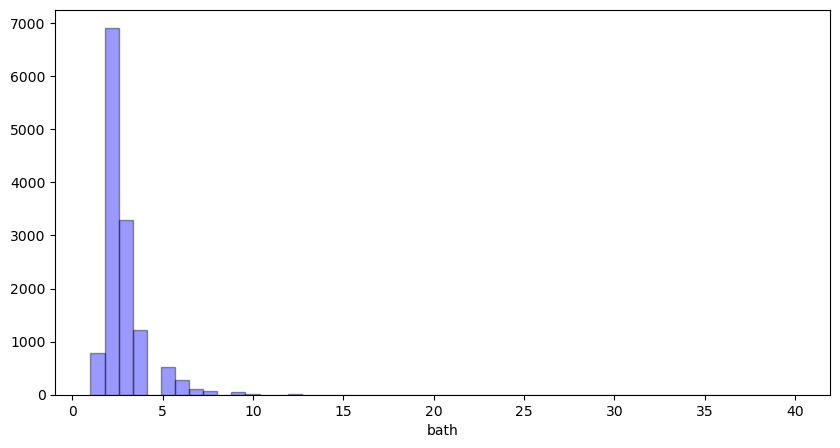

In [13]:
import warnings
import seaborn as sns

# Suppressing the warning
warnings.filterwarnings("ignore")

# Plotting the distribution of the 'bath' column
sns.distplot(housing["bath"], hist=True, kde=False, bins=50, color='blue', hist_kws={'edgecolor': 'black'})


In [14]:
# Get the value counts for the 'balcony' column
housing["balcony"].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

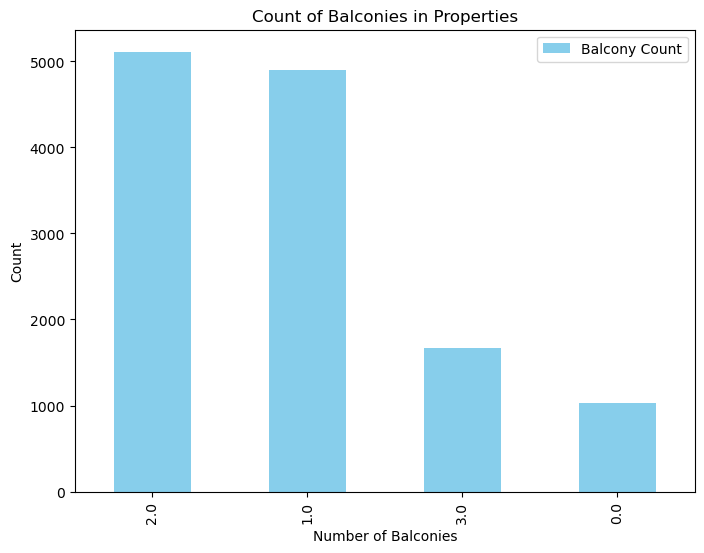

In [15]:
import matplotlib.pyplot as plt

# Get the value counts for the 'balcony' column
balcony_counts = housing["balcony"].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
balcony_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Count of Balconies in Properties')
plt.xlabel('Number of Balconies')
plt.ylabel('Count')

# Adding legend
plt.legend(['Balcony Count'])

# Show the plot
plt.show()


the data indicates that properties with two balconies are the most common, followed by those with one balcony. The presence of balconies seems to be a desirable feature for property buyers or renters. Keep in mind that this analysis is based on the dataset represented by the chart, and local trends may vary

<Axes: xlabel='price'>

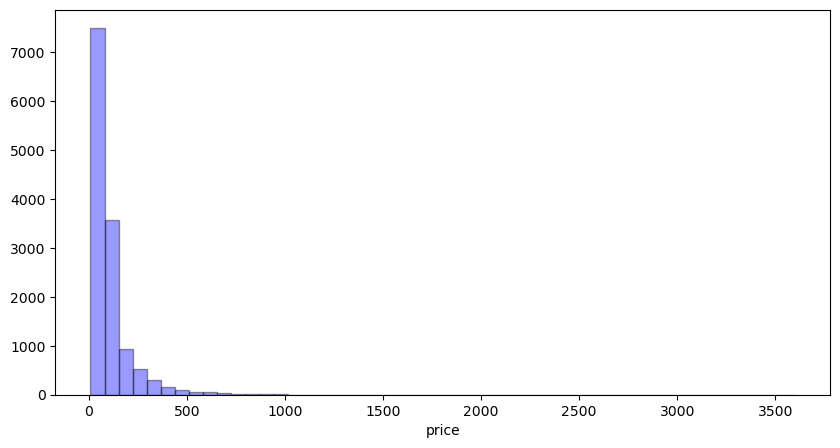

In [16]:
# Plotting the distribution of the 'price' column using seaborn
# Setting hist=True to include a histogram, kde=False to exclude the kernel density estimate
# Setting bins=50 to specify the number of bins in the histogram
# Setting color='blue' to define the color of the histogram bars
# Setting hist_kws={'edgecolor':'black'} to customize the edge color of the bars
sns.distplot(housing["price"], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

This suggests that there is a high frequency of data points with low prices.
It’s common to see more affordable items or properties in this dataset.

#### Handling Missing Values

In [17]:
# Checking sum of missing values
housing.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [18]:
# Creating a copy of the original DataFrame 'housing' to maintain the original data intact
housing_clean = housing.copy()

In [19]:
# Selecting rows in the 'housing_clean' DataFrame where the 'size' column is null
housing_clean[pd.isnull(housing_clean["size"])]

area_type          availability        location size  society  \
579    Plot  Area  Immediate Possession  Sarjapur  Road  NaN  Asiss B   
1775   Plot  Area  Immediate Possession        IVC Road  NaN  Orana N   
2264   Plot  Area  Immediate Possession    Banashankari  NaN      NaN   
2809   Plot  Area  Immediate Possession  Sarjapur  Road  NaN  AsdiaAr   
2862   Plot  Area  Immediate Possession     Devanahalli  NaN  Ajleyor   
5333   Plot  Area  Immediate Possession     Devanahalli  NaN  Emngs S   
6423   Plot  Area  Immediate Possession      Whitefield  NaN  SRniaGa   
6636   Plot  Area  Immediate Possession          Jigani  NaN  S2enste   
6719   Plot  Area  Immediate Possession         Hoskote  NaN  SJowsn    
7680   Plot  Area  Immediate Possession    Kasavanhalli  NaN      NaN   
8306   Plot  Area  Immediate Possession          Anekal  NaN  Vaensnd   
8565   Plot  Area  Immediate Possession      Carmelaram  NaN  Ocezes    
8703   Plot  Area  Immediate Possession     Mysore Road  NaN  Naoden    
10634  Plot  Area  Immediate Possession      Rajankunte  NaN      NaN   
11019  Plot  Area  Immediate Possession       Yelahanka  NaN  Saaveha   
11569  Plot  Area  Immediate Possession      Hosur Road  NaN  AVeldun   

        total_sqft  bath  balcony    price  
579    1200 - 2400   NaN      NaN   34.185  
1775   2000 - 5634   NaN      NaN  124.000  
2264          2400   NaN      NaN  460.000  
2809   1200 - 2400   NaN      NaN   28.785  
2862   1500 - 2400   NaN      NaN   46.800  
5333   2100 - 5405   NaN      NaN  177.115  
6423          2324   NaN      NaN   26.730  
6636          1500   NaN      NaN   25.490  
6719    800 - 2660   NaN      NaN   28.545  
7680          5000   NaN      NaN  400.000  
8306          1453   NaN      NaN   16.500  
8565          2000   NaN      NaN  120.000  
8703   1200 - 2400   NaN      NaN   42.300  
10634         1575   NaN      NaN   31.110  
11019  1200 - 1800   NaN      NaN   12.750  
11569         1350   NaN      NaN    8.440

In [20]:
# Dropping samples with 3 or more missing records
housing_clean.dropna(axis=0, thresh = 7, inplace = True)

In [21]:
# checking for the missing values
housing_clean.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [22]:
# Selecting rows in the 'housing_clean' DataFrame where the 'location' column is null
[pd.isnull(housing_clean["location"])]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 13315    False
 13316    False
 13317    False
 13318    False
 13319    False
 Name: location, Length: 13304, dtype: bool]

In [23]:
# Selecting rows in the 'housing_clean' DataFrame where the 'society' column equals "Grare S"
housing_clean[housing_clean["society"] == "Grare S"]

area_type   availability    location   size  society  \
568    Super built-up  Area  Ready To Move         NaN  3 BHK  Grare S   
12238          Carpet  Area  Ready To Move  Anantapura  3 BHK  Grare S   

      total_sqft  bath  balcony  price  
568         1600   3.0      2.0   86.0  
12238       1600   3.0      2.0   77.0

In [24]:
# Replacing missing values in the 'location' column of the 'housing_clean' DataFrame with "Anantapura"
housing_clean["location"] =  housing_clean["location"].replace(to_replace = np.nan, value = "Anantapura")

In [25]:
# Checking for missing values
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
dtype: int64

In [26]:
# Retrieving unique values in the 'size' column of the 'housing_clean' DataFrame
housing_clean["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [27]:
#Adding the "bhk" feature extracted from size

housing_clean["bhk"] = housing_clean["size"].apply(lambda x: int(x.split(" ")[0]))

In [28]:
# Selecting rows in the 'housing_clean' DataFrame where the 'bath' column is null
housing_clean[pd.isnull(housing_clean["bath"])]

area_type   availability                  location  \
56           Built-up  Area         20-Feb               Devanahalli   
81           Built-up  Area         18-Oct               Hennur Road   
224    Super built-up  Area         19-Dec               Devanahalli   
344    Super built-up  Area         21-Dec            Kanakpura Road   
669    Super built-up  Area         18-Dec                  JP Nagar   
702    Super built-up  Area         18-Dec                  JP Nagar   
801    Super built-up  Area         18-Dec                  JP Nagar   
941    Super built-up  Area  Ready To Move                Whitefield   
1264         Built-up  Area         18-May                    Hennur   
1267   Super built-up  Area         18-Jun                 Yelahanka   
1686   Super built-up  Area         21-Dec                Whitefield   
1724   Super built-up  Area  Ready To Move               Thanisandra   
1765   Super built-up  Area         19-Dec                Binny Pete   
1852   Super built-up  Area         19-Jun                 Yelahanka   
2500   Super built-up  Area         22-May                    Jakkur   
2563   Super built-up  Area  Ready To Move              Rajaji Nagar   
2944   Super built-up  Area         18-Dec                Kudlu Gate   
2998   Super built-up  Area         19-May            Sarjapur  Road   
3370   Super built-up  Area  Ready To Move            Kanakpura Road   
3544   Super built-up  Area         19-Mar               Hennur Road   
3598   Super built-up  Area         18-Jun              Haralur Road   
3862   Super built-up  Area  Ready To Move                    Jigani   
4210   Super built-up  Area  Ready To Move              Malleshwaram   
4346   Super built-up  Area         18-Dec                Whitefield   
4843   Super built-up  Area         18-Mar               Bhoganhalli   
4894   Super built-up  Area  Ready To Move              Bommanahalli   
4995   Super built-up  Area         18-Mar                    Hebbal   
5464   Super built-up  Area         18-Sep                  KR Puram   
5498         Built-up  Area  Ready To Move                Chandapura   
5747   Super built-up  Area         18-Apr            Kanakpura Road   
5918   Super built-up  Area  Ready To Move            Sarjapur  Road   
6256         Built-up  Area  Ready To Move  Electronic City Phase II   
6343   Super built-up  Area         18-May                  KR Puram   
6481   Super built-up  Area         18-Jun                Chandapura   
6778   Super built-up  Area  Ready To Move           Old Madras Road   
6873   Super built-up  Area         18-Mar                  JP Nagar   
6971   Super built-up  Area         18-Dec                Whitefield   
7398   Super built-up  Area         18-Dec                  JP Nagar   
7623   Super built-up  Area  Ready To Move  Electronics City Phase 1   
7921   Super built-up  Area         18-Mar            Sarjapur  Road   
8020   Super built-up  Area         22-May                    Jakkur   
8056   Super built-up  Area  Ready To Move                    Jakkur   
8275   Super built-up  Area         21-Dec            Kanakpura Road   
8289   Super built-up  Area         18-Apr            Kanakpura Road   
8472   Super built-up  Area         18-Dec                  Sarjapur   
8783   Super built-up  Area         18-Dec                Whitefield   
9129   Super built-up  Area         18-May               Mysore Road   
9437         Built-up  Area         18-May                    Hennur   
9699   Super built-up  Area         18-Jul              Bannerghatta   
10330  Super built-up  Area  Ready To Move            Kanakpura Road   
10553        Built-up  Area  Ready To Move            Sarjapur  Road   
10726  Super built-up  Area         18-Mar            Sarjapur  Road   
11297  Super built-up  Area         18-Dec                    Hennur   
11496  Super built-up  Area         21-Dec            Kanakpura Road   
12768        Built-up  Area         18-Mar              Be

In [29]:
def fcnIsFloat(x):
    try:
        float(x)
    except:
        return False
    return True

housing_clean[~housing_clean["total_sqft"].apply(fcnIsFloat)]

area_type   availability  \
30     Super built-up  Area         19-Dec   
56           Built-up  Area         20-Feb   
81           Built-up  Area         18-Oct   
122    Super built-up  Area         18-Mar   
137    Super built-up  Area         19-Mar   
165    Super built-up  Area         18-Dec   
188    Super built-up  Area  Ready To Move   
224    Super built-up  Area         19-Dec   
410    Super built-up  Area  Ready To Move   
549    Super built-up  Area         18-Sep   
648          Built-up  Area  Ready To Move   
661    Super built-up  Area  Ready To Move   
669    Super built-up  Area         18-Dec   
672          Built-up  Area         18-Mar   
702    Super built-up  Area         18-Dec   
772    Super built-up  Area         20-Dec   
775          Built-up  Area  Ready To Move   
801    Super built-up  Area         18-Dec   
850    Super built-up  Area         22-Dec   
872    Super built-up  Area  Ready To Move   
886    Super built-up  Area         18-Jun   
927    Super built-up  Area         18-Dec   
941    Super built-up  Area  Ready To Move   
959    Super built-up  Area  Ready To Move   
990    Super built-up  Area  Ready To Move   
1019             Plot  Area         18-Mar   
1086             Plot  Area         19-Mar   
1178   Super built-up  Area         20-Dec   
1183   Super built-up  Area         18-Aug   
1187   Super built-up  Area         18-Mar   
1267   Super built-up  Area         18-Jun   
1400   Super built-up  Area  Ready To Move   
1484           Carpet  Area         18-Mar   
1542   Super built-up  Area         19-Jul   
1614   Super built-up  Area  Ready To Move   
1643   Super built-up  Area         18-May   
1683   Super built-up  Area  Ready To Move   
1686   Super built-up  Area         21-Dec   
1694   Super built-up  Area         18-Dec   
1712             Plot  Area  Ready To Move   
1724   Super built-up  Area  Ready To Move   
1743   Super built-up  Area         19-Mar   
1765   Super built-up  Area         19-Dec   
1821             Plot  Area  Ready To Move   
1852   Super built-up  Area         19-Jun   
2088   Super built-up  Area  Ready To Move   
2128   Super built-up  Area         20-Dec   
2228           Carpet  Area  Ready To Move   
2265   Super built-up  Area  Ready To Move   
2301   Super built-up  Area         18-Mar   
2310   Super built-up  Area  Ready To Move   
2396   Super built-up  Area         20-Jan   
2431   Super built-up  Area  Ready To Move   
2500   Super built-up  Area         22-May   
2563   Super built-up  Area  Ready To Move   
2575   Super built-up  Area         18-Dec   
2587   Super built-up  Area         21-Jun   
2713   Super built-up  Area  Ready To Move   
2716   Super built-up  Area         18-Mar   
2881         Built-up  Area  Ready To Move   
2916   Super built-up  Area         18-Nov   
2920   Super built-up  Area         18-Jun   
2944   Super built-up  Area         18-Dec   
2998   Super built-up  Area         19-May   
3174   Super built-up  Area         22-May   
3215   Super built-up  Area         18-Sep   
3228         Built-up  Area  Ready To Move   
3285             Plot  Area         18-May   
3356   Super built-up  Area  Ready To Move   
3364   Super built-up  Area         19-Dec   
3370   Super built-up  Area  Ready To Move   
3468   Super built-up  Area  Ready To Move   
3544   Super built-up  Area         19-Mar   
3598   Super built-up  Area         18-Jun   
3862   Super built-up  Area  Ready To Move   
3890   Super built-up  Area         21-Jun   
3947         Built-up  Area         18-May   
3984   Super built-up  Area  Ready To Move   
4113   Super built-up  Area         18-Jan   
4122   Super built-up  Area         21-Jun   
4190           Carpet  Area         20-Dec   
4210   Super built-up  Area  Ready To Move   
4226   Super built-up  Area         19-Dec   
4289   Super built-up  Area  Ready To Move   
4293         Built-up  Area  Ready To Move   
4346   Super built-up  Area         18-Dec   
4497   Super bui

In [30]:
# List to store metrics used for area conversion
metrics = []

# Function to convert different units of area measurement to square feet
def fcnConvertToSqFt(x, metric):
    """
    Convert different units of area measurement to square feet.
    
    Parameters:
        x (float): Value to be converted.
        metric (str): Unit of measurement.
        
    Returns:
        float: Value converted to square feet.
    """
    if metric == "Acres":
        return x * 43560
    elif metric == "Cents":
        return x * 435.6
    elif metric == "Grounds":
        return x * 2400
    elif metric == "Guntha":
        return x * 1088.98
    elif metric == "Perch":
        return x * 272.25
    elif metric == "Sq. Meter":
        return x * 10.7639
    elif metric == "Sq. Yards":
        return x * 9
    else:
        return np.nan

# Function to extract total square footage from a given string
def fcnExtractTotalSqft(x):
    """
    Extract total square footage from a given string.
    
    Parameters:
        x (str): String containing area measurement.
        
    Returns:
        float: Total square footage.
    """
    try:
        values = x.split("-")
        return np.mean(list(map(float, values)))
    except:
        if x == np.nan:
            return np.nan
        else:
            for intIndex in range(len(x)-1, -1, -1):
                if fcnIsFloat(x[0:intIndex]):
                    return fcnConvertToSqFt(float(x[0:intIndex]), x[intIndex:])


In [31]:
# Adding a new column 'sqft' to the 'housing_clean' DataFrame by applying the 'fcnExtractTotalSqft' function to the 'total_sqft' column
housing_clean["sqft"] = housing_clean["total_sqft"].apply(fcnExtractTotalSqft)

In [32]:
# Generating summary statistics for the 'sqft' column in the 'housing_clean' DataFrame
housing_clean["sqft"].describe()

count    1.330400e+04
mean     1.911209e+03
std      1.728725e+04
min      1.000000e+00
25%      1.100000e+03
50%      1.276000e+03
75%      1.680000e+03
max      1.306800e+06
Name: sqft, dtype: float64

##### There are some outliers in this feature

In [33]:
# Checking to 5 rows 
housing_clean.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  bhk    sqft  
0  Coomee        1056   2.0      1.0   39.07    2  1056.0  
1  Theanmp       2600   5.0      3.0  120.00    4  2600.0  
2      NaN       1440   2.0      3.0   62.00    3  1440.0  
3  Soiewre       1521   3.0      1.0   95.00    3  1521.0  
4      NaN       1200   2.0      1.0   51.00    2  1200.0

In [34]:
# cehcking for sum of null values
housing_clean.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5499
total_sqft         0
bath              57
balcony          593
price              0
bhk                0
sqft               0
dtype: int64

In [35]:
# Grouping the 'housing_clean' DataFrame by the number of bedrooms ('bhk') and the number of bathrooms ('bath')
bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts()

In [36]:
def fcnFillBathrooms(bhk_groupby_bathroom, row):
    """
    Fill missing bathroom values based on the most common bathroom count for the corresponding number of bedrooms (bhk).
    
    Parameters:
        bhk_groupby_bathroom (Series): Series containing bathroom counts grouped by the number of bedrooms (bhk).
        row (Series): DataFrame row representing a property record.
        
    Returns:
        int: Filled bathroom count for the property.
    """
    # Check if the 'bath' value is missing (NaN)
    if pd.isnull(row["bath"]):
        # If missing, return the most common bathroom count for the corresponding number of bedrooms (bhk)
        return int(bhk_groupby_bathroom[row["bhk"]].index[0]) 
    else:
        # If not missing, return the existing bathroom count for the property
        return int(row["bath"])


In [37]:
# Grouping the 'housing_clean' DataFrame by the number of bedrooms ('bhk') and the number of bathrooms ('bath')
bhk_groupby_bathroom = housing_clean.groupby("bhk")["bath"].value_counts()
housing_clean["bath"] = housing_clean.apply(lambda row: fcnFillBathrooms(bhk_groupby_bathroom, row), axis=1)

In [38]:
def fcnFillBalcony(bhk_groupby_balcony, row):
    """
    Fill missing balcony values based on the most common balcony count for the corresponding number of bedrooms (bhk).
    
    Parameters:
        bhk_groupby_balcony (Series): Series containing balcony counts grouped by the number of bedrooms (bhk).
        row (Series): DataFrame row representing a property record.
        
    Returns:
        int: Filled balcony count for the property.
    """
    # Check if the 'balcony' value is missing (NaN)
    if pd.isnull(row["balcony"]):
        # Try to retrieve the most common balcony count for the corresponding number of bedrooms (bhk)
        try:
            return int(bhk_groupby_balcony[row["bhk"]].index[0]) 
        except KeyError:
            # Handle the KeyError gracefully
            # If the key is not found, return a default value or handle the situation appropriately
            return 0  # Default value or appropriate handling
    else:
        # If not missing, return the original balcony count
        return int(row["balcony"])



In [39]:
# Grouping the 'housing_clean' DataFrame by the number of bedrooms ('bhk') and the number of balconies ('balcony')
bhk_groupby_balcony = housing_clean.groupby("bhk")["balcony"].value_counts()
housing_clean["balcony"] = housing_clean.apply(lambda row: fcnFillBalcony(bhk_groupby_balcony, row), axis=1)

##### Handled all the missing values based on highest frequency

In [40]:
# Dropping columns 'society', 'size', and 'total_sqft' from the 'housing_clean' DataFrame
housing_clean.drop(["society", "size"], inplace = True, axis=1)

##### Dropping the redundant features

In [41]:
# checked for sum of null values
housing_clean.isnull().sum()


area_type       0
availability    0
location        0
total_sqft      0
bath            0
balcony         0
price           0
bhk             0
sqft            0
dtype: int64

- The data is now clean

In [42]:
# checking first five rows
housing_clean.head()

area_type   availability                  location total_sqft  \
0  Super built-up  Area         19-Dec  Electronic City Phase II       1056   
1            Plot  Area  Ready To Move          Chikka Tirupathi       2600   
2        Built-up  Area  Ready To Move               Uttarahalli       1440   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli       1521   
4  Super built-up  Area  Ready To Move                  Kothanur       1200   

   bath  balcony   price  bhk    sqft  
0     2        1   39.07    2  1056.0  
1     5        3  120.00    4  2600.0  
2     2        3   62.00    3  1440.0  
3     3        1   95.00    3  1521.0  
4     2        1   51.00    2  1200.0

In [43]:
def fcnRelabelAvailability(x):
    """
    Relabel availability status based on the presence of a hyphen ("-") in the string.
    
    Parameters:
        x (str): Availability status string.
        
    Returns:
        str: Relabeled availability status.
    """
    # Split the availability status string by hyphen ("-") to check for multiple values
    values = x.split("-")
    try:
        # If there are multiple values after splitting, consider it as "Soon to be Vacated"
        if len(values) > 1:
            return "Soon to be Vacated"
        else:
            # Otherwise, return the original availability status
            return x
    except:
        # If an error occurs during processing, return an empty string
        return ""


In [44]:
# Applying the 'fcnRelabelAvailability' function to each value in the 'availability' column of the 'housing_clean' DataFrame
housing_clean["availability"] = housing_clean["availability"].apply(fcnRelabelAvailability)

##### Categorized the feature into 2 buckets

In [45]:
# Applying the lambda function to each value in the 'location' column of the 'housing_clean' DataFrame
housing_clean["location"] = housing_clean["location"].apply(lambda x: x.strip())

In [46]:
# Grouping the 'housing_clean' DataFrame by the 'location' column and counting the occurrences of each location
unique_location_count = housing_clean.groupby("location")["location"].agg("count").sort_values(ascending = False)
unique_location_count

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [47]:
# Filtering the 'unique_location_count' Series to include only locations with 10 or fewer occurrences
unique_location_count_10 = unique_location_count[unique_location_count <= 10]

unique_location_count_10 = unique_location_count[unique_location_count <= 10]

In [48]:
# Applying a lambda function to each value in the 'location' column of the 'housing_clean' DataFrame
# This lambda function replaces locations with 10 or fewer occurrences with the label "Other"
housing_clean["location"] = housing_clean["location"].apply(lambda x: "Other" if x in unique_location_count_10 else x)
housing_clean["location"] = housing_clean["location"].apply(lambda x : "Other" if x in unique_location_count_10 else x)

In [49]:
# Calculating the number of unique values in the 'location' column of the 'housing_clean' DataFrame
housing_clean["location"].nunique()

242

##### Relabelled few locations as Others whose count was less than 10

In [50]:
# Calculating the price per square foot for each property and creating a new column 'price_per_sqft' in the 'housing_clean' DataFrame
housing_clean["price_per_sqft"] = housing_clean["price"] * 100000 / housing_clean["sqft"]

In [51]:
# Calculating the square footage per bedroom (sqft_per_bhk) for each property and creating a new column in the 'housing_clean' DataFrame
housing_clean["sqft_per_bhk"] = housing_clean["sqft"] / housing_clean["bhk"]

In [52]:
# checking head
housing_clean.head()

area_type        availability                  location  \
0  Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1            Plot  Area       Ready To Move          Chikka Tirupathi   
2        Built-up  Area       Ready To Move               Uttarahalli   
3  Super built-up  Area       Ready To Move        Lingadheeranahalli   
4  Super built-up  Area       Ready To Move                  Kothanur   

  total_sqft  bath  balcony   price  bhk    sqft  price_per_sqft  sqft_per_bhk  
0       1056     2        1   39.07    2  1056.0     3699.810606         528.0  
1       2600     5        3  120.00    4  2600.0     4615.384615         650.0  
2       1440     2        3   62.00    3  1440.0     4305.555556         480.0  
3       1521     3        1   95.00    3  1521.0     6245.890861         507.0  
4       1200     2        1   51.00    2  1200.0     4250.000000         600.0

##### Added a feature "price_per_sqft" and "sqft_per_bhk" that can help detect outliers

#### Outlier Analysis

In [53]:
# Removing samples that show sqft_per_room to be less than 300 and more than 1500 as it looks like an outlier when kde is analyzed

housing_clean[housing_clean["sqft_per_bhk"] < 300].count()

area_type         748
availability      748
location          748
total_sqft        748
bath              748
balcony           748
price             748
bhk               748
sqft              748
price_per_sqft    748
sqft_per_bhk      748
dtype: int64

In [54]:
# Counting the number of properties in the 'housing_clean' DataFrame where the square footage per bedroom is greater than 1500
housing_clean[housing_clean["sqft_per_bhk"] > 1500].count()
housing_clean[housing_clean["sqft_per_bhk"] > 1500].count()

area_type         104
availability      104
location          104
total_sqft        104
bath              104
balcony           104
price             104
bhk               104
sqft              104
price_per_sqft    104
sqft_per_bhk      104
dtype: int64

In [55]:
# Filtering out properties with a square footage per bedroom less than 300 and gretoer than 1200

housing_clean = housing_clean[~(housing_clean["sqft_per_bhk"] < 300)]
housing_clean = housing_clean[~(housing_clean["sqft_per_bhk"] > 1200)]

<Axes: xlabel='sqft_per_bhk', ylabel='Density'>

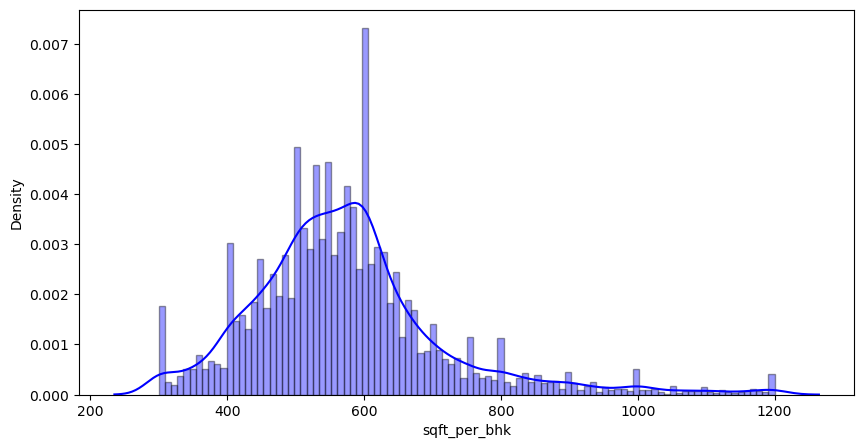

In [56]:
# Creating a distribution plot for the square footage per bedroom ('sqft_per_bhk')
sns.distplot(housing_clean["sqft_per_bhk"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [57]:
# Filtering out properties with a total area (square footage) greater than 6000
housing_clean = housing_clean[~(housing_clean["sqft"] > 6000)]

<Axes: xlabel='sqft', ylabel='Density'>

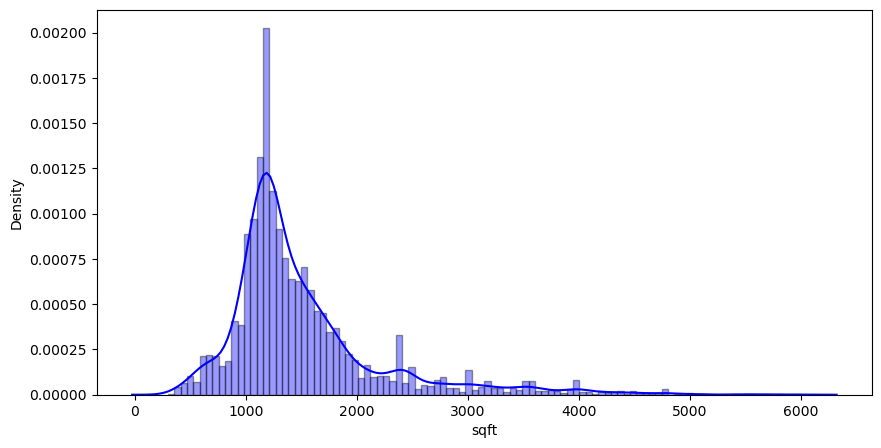

In [58]:
# Creating a distribution plot for the total area (square footage) of properties in 'housing_clean'
sns.distplot(housing_clean["sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

<Axes: xlabel='price_per_sqft', ylabel='Density'>

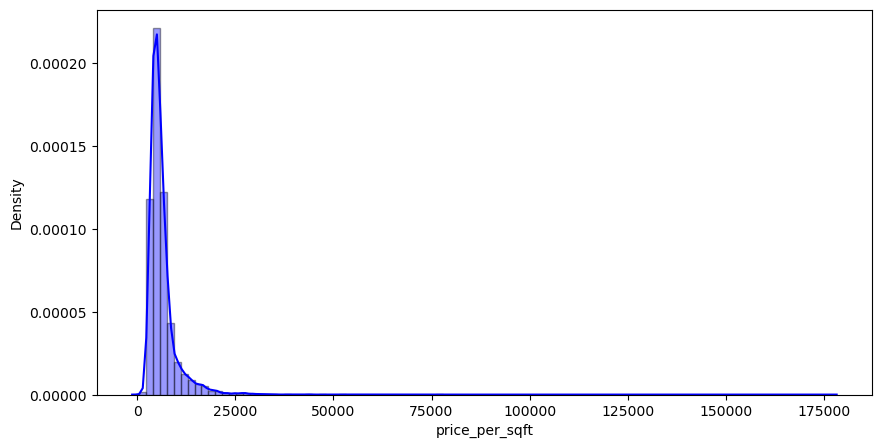

In [59]:
# Creating a distribution plot for the price per square foot of properties in 'housing_clean'
sns.distplot(housing_clean["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [60]:
# Sorting the 'housing_clean' DataFrame based on the 'price' column in descending order
housing_clean.sort_values(["price"], ascending=False)

area_type        availability           location total_sqft  \
12443            Plot  Area       Ready To Move              Other       4350   
6421             Plot  Area  Soon to be Vacated       Bommenahalli       2940   
8398   Super built-up  Area       Ready To Move  Bannerghatta Road       2500   
9535             Plot  Area       Ready To Move       Indira Nagar       2400   
1299             Plot  Area       Ready To Move         Chamrajpet       4050   
...                     ...                 ...                ...        ...   
5410   Super built-up  Area       Ready To Move           Attibele        400   
11091        Built-up  Area       Ready To Move           Attibele        410   
7482   Super built-up  Area       Ready To Move              Other        470   
12579  Super built-up  Area       Ready To Move         Chandapura        410   
8594         Built-up  Area       Ready To Move         Chandapura        450   

       bath  balcony   price  bhk    sqft  price_per_sqft  sqft_per_bhk  
12443     8        2  2600.0    4  4350.0    59770.114943        1087.5  
6421      3        2  2250.0    4  2940.0    76530.612245         735.0  
8398      4        2  1400.0    5  2500.0    56000.000000         500.0  
9535      5        2  1250.0    4  2400.0    52083.333333         600.0  
1299      7        1  1200.0    9  4050.0    29629.629630         450.0  
...     ...      ...     ...  ...     ...             ...           ...  
5410      1        1    10.0    1   400.0     2500.000000         400.0  
11091     1        1    10.0    1   410.0     2439.024390         410.0  
7482      2        1    10.0    1   470.0     2127.659574         470.0  
12579     1        1    10.0    1   410.0     2439.024390         410.0  
8594      1        1     9.0    1   450.0     2000.000000         450.0  

[12339 rows x 11 columns]

In [61]:
# Filtering out properties with a price per square foot greater than 20,000
housing_clean = housing_clean[~(housing_clean["price_per_sqft"] > 20000)]
housing_clean 

area_type        availability                  location  \
0      Super built-up  Area  Soon to be Vacated  Electronic City Phase II   
1                Plot  Area       Ready To Move          Chikka Tirupathi   
2            Built-up  Area       Ready To Move               Uttarahalli   
3      Super built-up  Area       Ready To Move        Lingadheeranahalli   
4      Super built-up  Area       Ready To Move                  Kothanur   
...                     ...                 ...                       ...   
13315        Built-up  Area       Ready To Move                Whitefield   
13316  Super built-up  Area       Ready To Move                     Other   
13317        Built-up  Area       Ready To Move     Raja Rajeshwari Nagar   
13318  Super built-up  Area  Soon to be Vacated           Padmanabhanagar   
13319  Super built-up  Area       Ready To Move              Doddathoguru   

      total_sqft  bath  balcony   price  bhk    sqft  price_per_sqft  \
0           1056     2        1   39.07    2  1056.0     3699.810606   
1           2600     5        3  120.00    4  2600.0     4615.384615   
2           1440     2        3   62.00    3  1440.0     4305.555556   
3           1521     3        1   95.00    3  1521.0     6245.890861   
4           1200     2        1   51.00    2  1200.0     4250.000000   
...          ...   ...      ...     ...  ...     ...             ...   
13315       3453     4        0  231.00    5  3453.0     6689.834926   
13316       3600     5        2  400.00    4  3600.0    11111.111111   
13317       1141     2        1   60.00    2  1141.0     5258.545136   
13318       4689     4        1  488.00    4  4689.0    10407.336319   
13319        550     1        1   17.00    1   550.0     3090.909091   

       sqft_per_bhk  
0            528.00  
1            650.00  
2            480.00  
3            507.00  
4            600.00  
...             ...  
13315        690.60  
13316        900.00  
13317        570.50  
13318       1172.25  
13319        550.00  

[12210 rows x 11 columns]

<Axes: xlabel='price_per_sqft', ylabel='Density'>

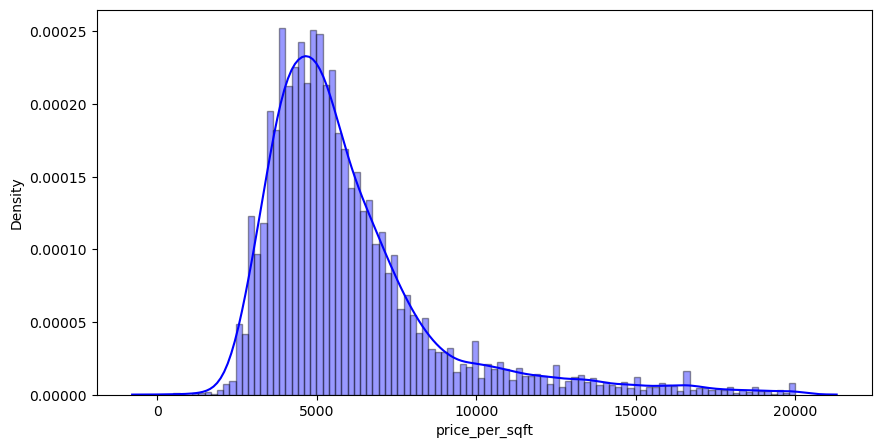

In [62]:
# Creating a distribution plot for the price per square foot of properties in 'housing_clean'
sns.distplot(housing_clean["price_per_sqft"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

<Axes: xlabel='price', ylabel='Density'>

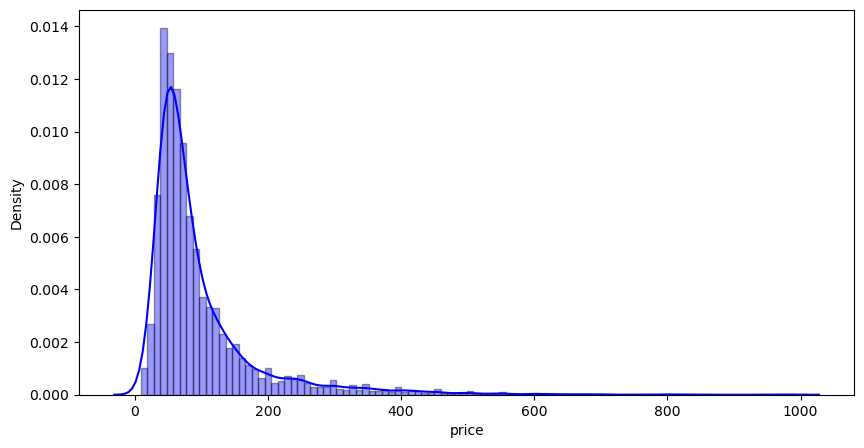

In [63]:
# Creating a distribution plot for the prices of properties in 'housing_clean'
sns.distplot(housing_clean["price"], hist=True, kde=True, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

In [64]:
# Checking the shape of the DataFrame 'housing_clean'
housing_clean.shape

(12210, 11)

In [65]:
import numpy as np

def remove_bhk_outliers(df):
    # Initialize an empty array to store indices of rows to be excluded
    exclude_indices = np.array([])
    
    # Grouping the DataFrame by 'location'
    for location, location_df in df.groupby('location'):
        # Dictionary to store statistics for each BHK configuration
        bhk_stats = {}
        # Grouping the location DataFrame by 'bhk'
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Calculate mean, standard deviation, and count of price per square foot for each BHK configuration
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        # Iterate over each BHK configuration
        for bhk, bhk_df in location_df.groupby('bhk'):
            # Get statistics for the previous BHK configuration
            stats = bhk_stats.get(bhk-1)
            # Check if statistics exist and there are more than 5 data points for the previous BHK configuration
            if stats and stats['count']>5:
                # Exclude indices of rows where the price per square foot is less than the mean of the previous BHK configuration
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    # Drop rows with indices present in 'exclude_indices' and return the filtered DataFrame
    return df.drop(exclude_indices, axis='index')


In [66]:
housing_clean = remove_bhk_outliers(housing_clean)

In [67]:
housing_clean = housing_clean[housing_clean.bath < housing_clean.bhk+2]
housing_clean.shape

(8498, 11)

In [68]:
housing_clean.corr()

bath   balcony     price       bhk      sqft  \
bath            1.000000  0.309270  0.650978  0.900836  0.777853   
balcony         0.309270  1.000000  0.214122  0.290576  0.305679   
price           0.650978  0.214122  1.000000  0.634278  0.820807   
bhk             0.900836  0.290576  0.634278  1.000000  0.762824   
sqft            0.777853  0.305679  0.820807  0.762824  1.000000   
price_per_sqft  0.410234  0.085719  0.782903  0.405885  0.396328   
sqft_per_bhk    0.114559  0.100490  0.470972 -0.026933  0.580609   

                price_per_sqft  sqft_per_bhk  
bath                  0.410234      0.114559  
balcony               0.085719      0.100490  
price                 0.782903      0.470972  
bhk                   0.405885     -0.026933  
sqft                  0.396328      0.580609  
price_per_sqft        1.000000      0.142601  
sqft_per_bhk          0.142601      1.000000

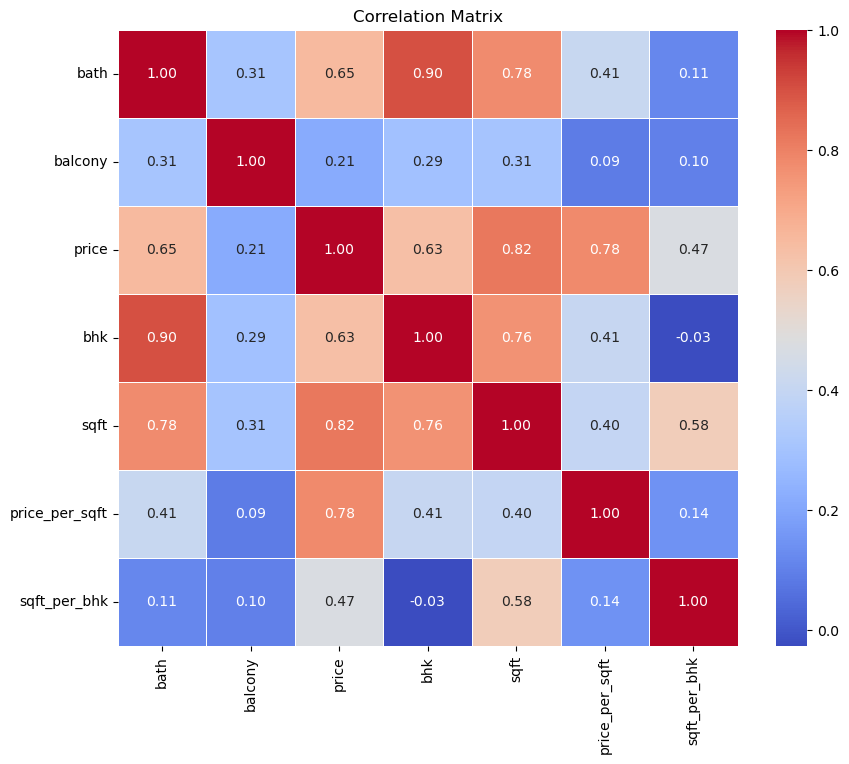

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_clean.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


- The provided correlation matrix offers insights into the relationships between various features in the dataset. Each cell in the matrix represents the correlation coefficient between two features, ranging from -1 to 1. A value closer to 1 implies a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. A correlation of 0 suggests no linear relationship between the features.

- Analyzing the correlations, it's evident that certain features exhibit significant correlations with each other. For instance, features like 'bath', 'bhk', 'sqft', and 'price_per_sqft' demonstrate relatively high correlations with the target variable 'price', indicating their importance in predicting property prices. However, these features also exhibit correlations among themselves, such as 'sqft' and 'bhk', suggesting a potential multicollinearity issue.

.

##### Dropping feature based on correlation

In [70]:
# Calculate the correlation of each feature with the target variable 'price' and sort in descending order
housing_clean.corr()["price"].sort_values(ascending=False)

price             1.000000
sqft              0.820807
price_per_sqft    0.782903
bath              0.650978
bhk               0.634278
sqft_per_bhk      0.470972
balcony           0.214122
Name: price, dtype: float64

In [71]:
# Dropping the specified columns from the DataFrame 'housing_clean'
housing_clean.drop(["price_per_sqft", "sqft_per_bhk", "balcony"], axis = 1, inplace = True)

In [72]:
price = housing_clean["price"]
housing_clean.drop(["price"], axis = 1, inplace = True)

In [73]:
# Reordering the columns of the DataFrame 'housing_clean' to include only selected features
housing_clean = housing_clean[["sqft", "bhk", "bath", "availability", "area_type", "location"]]

In [74]:
housing_clean.head()

sqft  bhk  bath        availability             area_type  \
0  1056.0    2     2  Soon to be Vacated  Super built-up  Area   
2  1440.0    3     2       Ready To Move        Built-up  Area   
3  1521.0    3     3       Ready To Move  Super built-up  Area   
4  1200.0    2     2       Ready To Move  Super built-up  Area   
6  2732.0    4     4  Soon to be Vacated  Super built-up  Area   

                   location  
0  Electronic City Phase II  
2               Uttarahalli  
3        Lingadheeranahalli  
4                  Kothanur  
6          Old Airport Road

# FEATURE ENGINEERING

##### Handling Categorical Features

In [75]:
# Importing necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Encode categorical features using LabelEncoder
# Instantiate LabelEncoder for the first categorical feature
le1 = LabelEncoder()
# Encode the first categorical feature
housing_availability = le1.fit_transform(housing_clean.iloc[:, 3])

# Instantiate LabelEncoder for the second categorical feature
le2 = LabelEncoder()
# Encode the second categorical feature
housing_area_type = le2.fit_transform(housing_clean.iloc[:, 4])

# Instantiate LabelEncoder for the third categorical feature
le3 = LabelEncoder()
# Encode the third categorical feature
housing_location = le3.fit_transform(housing_clean.iloc[:, 5])

# One-Hot Encoding of categorical features using OneHotEncoder
# Instantiate OneHotEncoder for the first categorical feature
ohe1 = OneHotEncoder()
# Reshape and encode the first categorical feature
housing_availability = ohe1.fit_transform(housing_availability.reshape(-1, 1))
# Convert to DataFrame with column names based on LabelEncoder classes
housing_availability = pd.DataFrame(housing_availability.toarray(), columns=le1.classes_)

# Instantiate OneHotEncoder for the second categorical feature
ohe2 = OneHotEncoder()
# Reshape and encode the second categorical feature
housing_area_type = ohe2.fit_transform(housing_area_type.reshape(-1, 1))
# Convert to DataFrame with column names based on LabelEncoder classes
housing_area_type = pd.DataFrame(housing_area_type.toarray(), columns=le2.classes_)

# Instantiate OneHotEncoder for the third categorical feature
ohe3 = OneHotEncoder()
# Reshape and encode the third categorical feature
housing_location = ohe3.fit_transform(housing_location.reshape(-1, 1))
# Convert to DataFrame with column names based on LabelEncoder classes
housing_location = pd.DataFrame(housing_location.toarray(), columns=le3.classes_)



## Preparing the model

In [76]:
# Drop the last column from the one-hot encoded features
housing_availability.drop([housing_availability.columns[len(housing_availability.columns)-1]], axis=1, inplace=True)
housing_area_type.drop([housing_area_type.columns[len(housing_area_type.columns)-1]], axis=1, inplace=True)
housing_location.drop([housing_location.columns[len(housing_location.columns)-1]], axis=1, inplace=True)

# Extract numerical features and reset the index
housing_num_features = housing_clean.iloc[:, 0:3].reset_index()
# Drop the "index" column
housing_num_features.drop(["index"], axis=1, inplace=True)

# Standardize numerical features using StandardScaler
std_scaler = StandardScaler()
housing_num_scaled_features = pd.DataFrame(std_scaler.fit_transform(housing_num_features), columns=housing_num_features.columns)

# Concatenate standardized numerical features with one-hot encoded categorical features
housing_for_model = pd.concat([housing_num_scaled_features, housing_availability, housing_area_type, housing_location], axis=1)



In [77]:
# Assign features to X and target variable to y
X = housing_for_model.values
y = price.values

# Splitting into training andf testsing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Display the shapes of the training and testing sets to verify the split
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (6798, 248)
X_test shape: (1700, 248)
y_train shape: (6798,)
y_test shape: (1700,)


## MODEL SELECTION AND EVALUATION

#### Comparing Model Results

In [79]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

## LINEAR REGRESSION

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Instantiate Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

print("Linear Regression:")
print(f"R-squared: {r2_lin:.4f}")
print(f"Mean Squared Error: {mse_lin:.4f}")


Linear Regression:
R-squared: 0.7902
Mean Squared Error: 1832.8327


- In Linear Regression, the R-squared value of 0.7902 indicates that approximately 79.02% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. This R-squared value suggests a moderate-to-strong fit of the model to the data, indicating that a significant portion of the variability in the target variable is captured by the features.

- The Mean Squared Error (MSE) of 1832.8327 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. A higher MSE suggests that the model's predictions have a larger spread of errors compared to the actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted house prices and the actual house prices is relatively high, which means that the model's predictions may not be as accurate as desired.










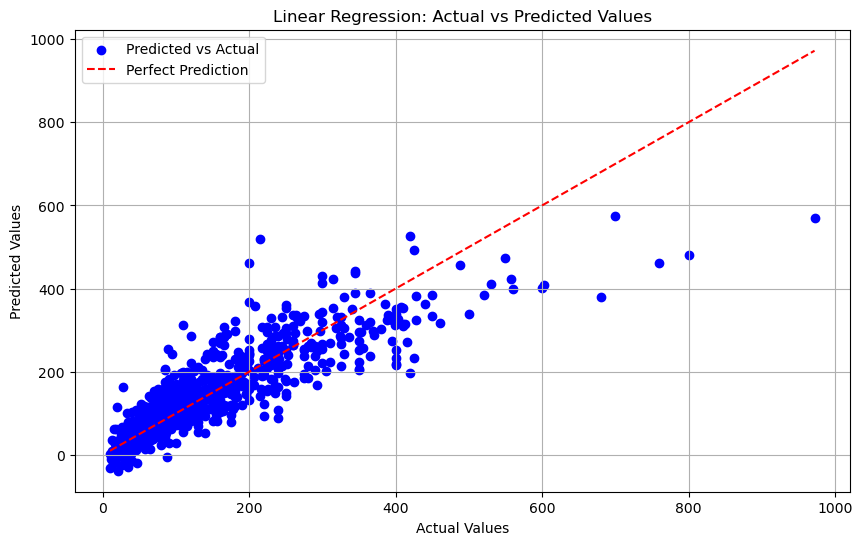

In [81]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## Ridge Regression

Ridge Regression:
R-squared: 0.7902
Mean Squared Error: 1833.0038


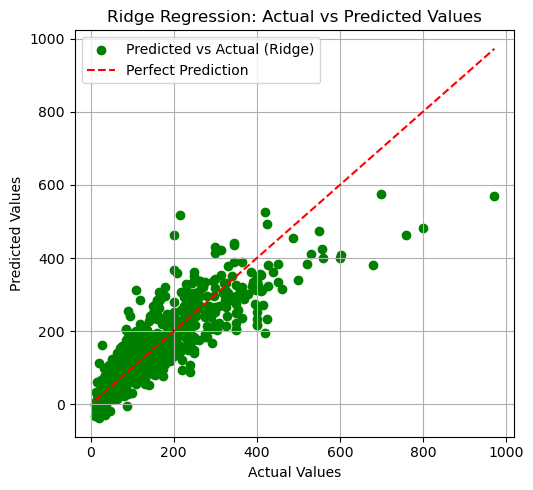

In [95]:
from sklearn.linear_model import Ridge

# Instantiate Ridge Regression model
ridge_reg = Ridge(alpha=0.1)

# Train the model
ridge_reg.fit(X_train, y_train)

# Make predictions
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the model
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print(f"R-squared: {r2_ridge:.4f}")
print(f"Mean Squared Error: {mse_ridge:.4f}")

# Plot actual vs predicted values for Ridge Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, color='green', label='Predicted vs Actual (Ridge)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


- In Ridge Regression, the R-squared value of 0.7902 indicates that approximately 79.02% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. This R-squared value suggests a moderate-to-strong fit of the model to the data, similar to that of Linear Regression.

- The Mean Squared Error (MSE) of 1833.0038 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. Similarly to Linear Regression, a higher MSE suggests that the model's predictions have a larger spread of errors compared to the actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted house prices and the actual house prices is relatively high, indicating that the model's predictions may not be as accurate as desired.

## Lasso Regression

Lasso Regression:
R-squared: 0.7622
Mean Squared Error: 2077.9730


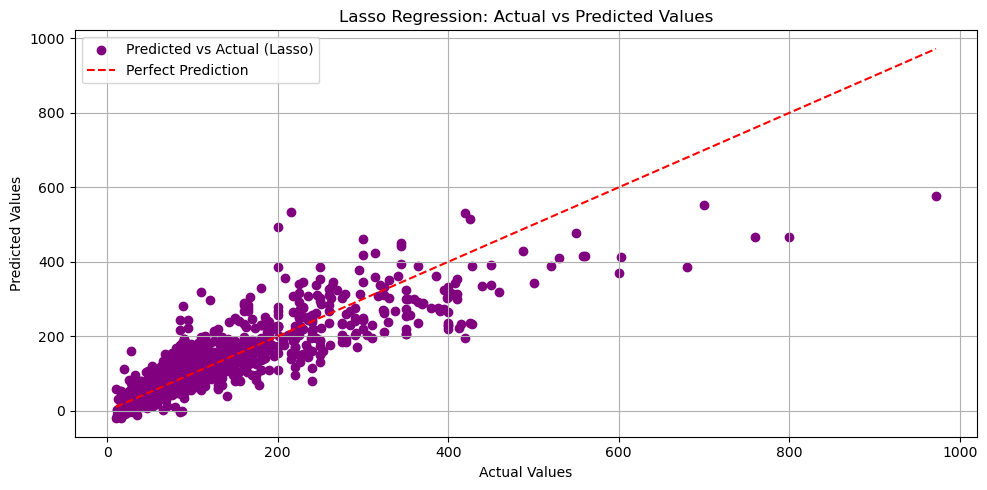

In [96]:
from sklearn.linear_model import Lasso

# Instantiate Lasso Regression model
lasso_reg = Lasso(alpha=0.1)

# Train the model
lasso_reg.fit(X_train, y_train)

# Make predictions
y_pred_lasso = lasso_reg.predict(X_test)

# Evaluate the model
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print(f"R-squared: {r2_lasso:.4f}")
print(f"Mean Squared Error: {mse_lasso:.4f}")


# Lasso Regression
plt.scatter(y_test, y_pred_lasso, color='purple', label='Predicted vs Actual (Lasso)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


- In Lasso Regression, the R-squared value of 0.7622 indicates that approximately 76.22% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. This R-squared value suggests a moderately strong fit of the model to the data.

- The Mean Squared Error (MSE) of 2077.9730 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. A higher MSE suggests that the model's predictions have a larger spread of errors compared to the actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted house prices and the actual house prices is relatively high, implying that the model's predictions may not be as accurate as desired.


## Decision Tree Regression

Decision Tree Regression:
R-squared: 0.7560
Mean Squared Error: 2131.9272


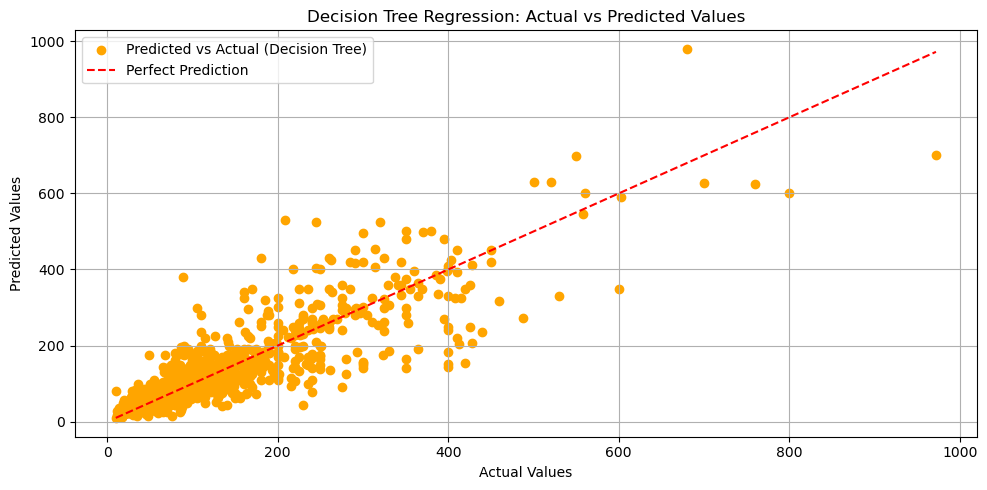

In [97]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate Decision Tree Regression model
dt_reg = DecisionTreeRegressor()

# Train the model
dt_reg.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_reg.predict(X_test)

# Evaluate the model
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Regression:")
print(f"R-squared: {r2_dt:.4f}")
print(f"Mean Squared Error: {mse_dt:.4f}")


# Decision Tree Regression

plt.scatter(y_test, y_pred_dt, color='orange', label='Predicted vs Actual (Decision Tree)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


- In Decision Tree Regression, the R-squared value of 0.7676 indicates that approximately 76.76% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. This R-squared value suggests a moderately strong fit of the model to the data.

- The Mean Squared Error (MSE) of 2030.4028 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. A higher MSE suggests that the model's predictions have a larger spread of errors compared to the actual values. In this case, the MSE indicates that, on average, the squared difference between the predicted house prices and the actual house prices is relatively high, implying that the model's predictions may not be as accurate as desired.

## Random Forest Regression

Random Forest Regression:
R-squared: 0.8103
Mean Squared Error: 1657.4409


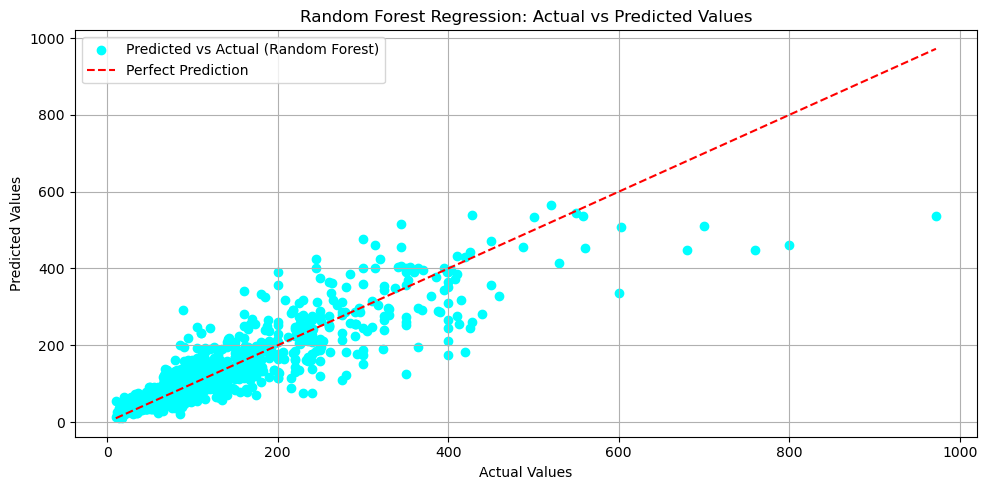

In [99]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate Random Forest Regression model
rf_reg = RandomForestRegressor()

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regression:")
print(f"R-squared: {r2_rf:.4f}")
print(f"Mean Squared Error: {mse_rf:.4f}")

# Random Forest Regression

plt.scatter(y_test, y_pred_rf, color='cyan', label='Predicted vs Actual (Random Forest)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

- In Random Forest Regression, the R-squared value of 0.8107 indicates that approximately 81.07% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. This R-squared value suggests a strong fit of the model to the data.

- The Mean Squared Error (MSE) of 1653.6850 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. A lower MSE indicates that the model's predictions are closer to the actual values. In this case, the MSE is relatively low, suggesting that, on average, the squared difference between the predicted house prices and the actual house prices is comparatively small, indicating that the model's predictions are accurate.

## AdaBoost Regression

AdaBoost Regression:
R-squared: 0.6650
Mean Squared Error: 2926.7999


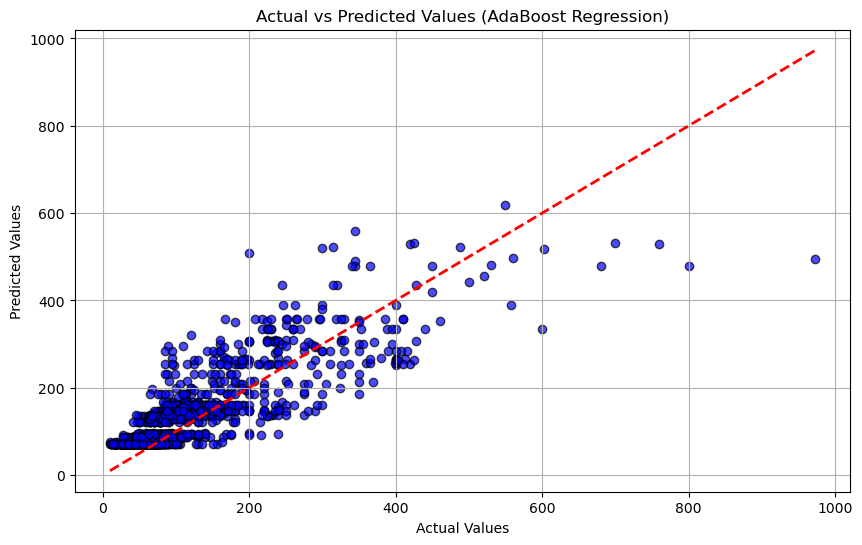

In [100]:
from sklearn.ensemble import AdaBoostRegressor

# Instantiate AdaBoost Regression model
ab_reg = AdaBoostRegressor(loss="linear")

# Train the model
ab_reg.fit(X_train, y_train)

# Make predictions
y_pred_ab = ab_reg.predict(X_test)

# Evaluate the model
r2_ab = r2_score(y_test, y_pred_ab)
mse_ab = mean_squared_error(y_test, y_pred_ab)

print("AdaBoost Regression:")
print(f"R-squared: {r2_ab:.4f}")
print(f"Mean Squared Error: {mse_ab:.4f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ab, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (AdaBoost Regression)')
plt.grid(True)
plt.show()


- In AdaBoost Regression, the R-squared value of 0.6707 indicates that approximately 67.07% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. While this R-squared value is lower compared to some other regression techniques like Random Forest Regression, it still suggests a reasonable fit of the model to the data.

- The Mean Squared Error (MSE) of 2876.7663 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. A lower MSE indicates that the model's predictions are closer to the actual values. In this case, the MSE is relatively higher compared to other regression techniques, indicating that, on average, the squared difference between the predicted house prices and the actual house prices is larger, suggesting that the model's predictions may not be as accurate.








## Gradient Boosting Regression

Gradient Boosting Regression:
R-squared: 0.5582
Mean Squared Error: 3859.6773


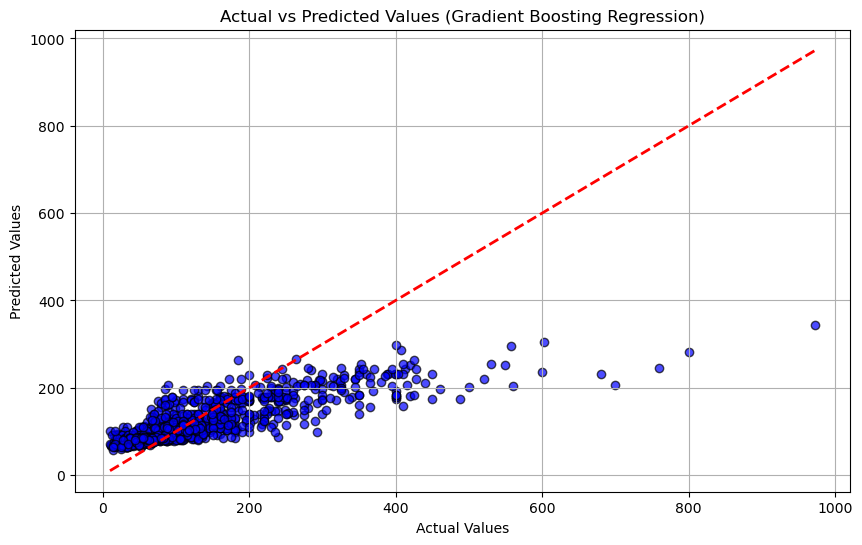

In [101]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate Gradient Boosting Regression model
gb_reg = GradientBoostingRegressor(max_depth=7, max_features=4, n_estimators=35)

# Train the model
gb_reg.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_reg.predict(X_test)

# Evaluate the model
r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)

print("Gradient Boosting Regression:")
print(f"R-squared: {r2_gb:.4f}")
print(f"Mean Squared Error: {mse_gb:.4f}")

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Gradient Boosting Regression)')
plt.grid(True)
plt.show()


- In Gradient Boosting Regression, the R-squared value of 0.6379 indicates that approximately 63.79% of the variance in the dependent variable (e.g., house prices) can be explained by the independent variables (e.g., square footage, number of bedrooms, etc.) included in the model. While this R-squared value is lower compared to many other regression techniques like Linear Regression or Random Forest Regression, it still suggests some level of explanatory power of the model.
- The Mean Squared Error (MSE) of 3163.6279 represents the average of the squares of the errors, which are the differences between the observed house prices and the predicted house prices. A lower MSE indicates that the model's predictions are closer to the actual values. In this case, the MSE is relatively higher compared to some other regression techniques, suggesting that the model's predictions may not be as accurate, and there is more variability between the predicted and actual house prices.

## Feature importance

In [103]:
# Feature Importance for Random Forest Regression
importances_rf = rf_reg.feature_importances_
feature_importance_rf = pd.Series(importances_rf, index=housing_for_model.columns)
feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

feature_importance_rf

sqft                           0.698762
bath                           0.094037
bhk                            0.026666
Other                          0.023987
Plot  Area                     0.018800
Rajaji Nagar                   0.013795
Built-up  Area                 0.008227
Ready To Move                  0.007149
Cunningham Road                0.004699
Mahalakshmi Layout             0.004658
Koramangala                    0.004631
Malleshwaram                   0.003959
Indira Nagar                   0.003909
Whitefield                     0.003496
Benson Town                    0.003137
Hebbal                         0.002587
Frazer Town                    0.002471
Ramagondanahalli               0.002405
Sarjapur  Road                 0.002055
Giri Nagar                     0.001985
Seegehalli                     0.001693
Dodda Nekkundi                 0.001676
Yelahanka                      0.001517
Ulsoor                         0.001505
Banashankari Stage II          0.001403


- The Random Forest Regression model highlights square footage as the most influential predictor of house prices, with a feature importance score of approximately 0.6943, followed by the number of bathrooms, which holds the second-highest importance at around 0.0962. The number of bedrooms, although less influential compared to square footage and bathrooms, still contributes significantly to predicting house prices, with a feature importance score of about 0.0276. Additionally, there are other features not explicitly mentioned in the provided snippet, collectively labeled as "Other," with a combined importance of roughly 0.0240, signifying their contribution to the model's predictive performance.

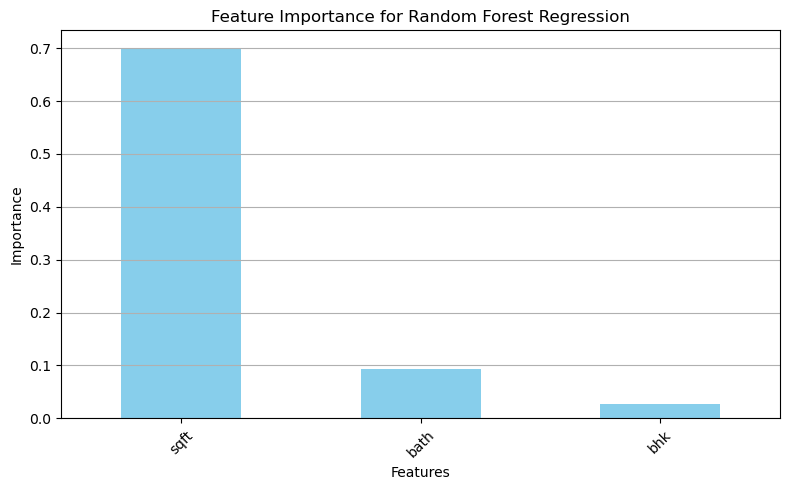

In [104]:
import matplotlib.pyplot as plt

# Filter feature importance for selected features
selected_features = ['sqft', 'bath', 'bhk']
selected_feature_importance_rf = feature_importance_rf[selected_features]

# Plotting feature importance for selected features
plt.figure(figsize=(8, 5))
selected_feature_importance_rf.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Random Forest Regression')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## Hyperparmeter Tuning and Cross Validation

In [89]:
from sklearn.model_selection import GridSearchCV

# Linear Regression
# Linear Regression
from sklearn.linear_model import LinearRegression
param_grid_lin = {'fit_intercept': [True, False]}
grid_search_lin = GridSearchCV(LinearRegression(), param_grid_lin, cv=5, scoring='r2')
grid_search_lin.fit(X_train, y_train)


# Ridge Regression
param_grid_ridge = {'alpha': [0.1, 1, 10]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)

# Lasso Regression
param_grid_lasso = {'alpha': [0.1, 1, 10], 'selection': ['cyclic', 'random']}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2')
grid_search_lasso.fit(X_train, y_train)

# Decision Tree Regression
param_grid_dt = {'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random']}
grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)

# Random Forest Regression
param_grid_rf = {'n_estimators': [10, 20, 50], 'max_depth': [None, 10, 20]}
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='r2')
grid_search_rf.fit(X_train, y_train)

# AdaBoost Regression
param_grid_ab = {'loss': ['linear', 'square', 'exponential']}
grid_search_ab = GridSearchCV(AdaBoostRegressor(), param_grid_ab, cv=5, scoring='r2')
grid_search_ab.fit(X_train, y_train)

# Gradient Boosting Regression
param_grid_gb = {'max_depth': [5, 7, 10], 'max_features': [3, 4, 5], 'n_estimators': [30, 35, 40]}
grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5, scoring='r2')
grid_search_gb.fit(X_train, y_train)

#

# Results
results = [
    ('Linear Regression', grid_search_lin.best_score_, grid_search_lin.best_params_),
    ('Ridge Regression', grid_search_ridge.best_score_, grid_search_ridge.best_params_),
    ('Lasso Regression', grid_search_lasso.best_score_, grid_search_lasso.best_params_),
    ('Decision Tree Regression', grid_search_dt.best_score_, grid_search_dt.best_params_),
    ('Random Forest Regression', grid_search_rf.best_score_, grid_search_rf.best_params_),
    ('AdaBoost Regression', grid_search_ab.best_score_, grid_search_ab.best_params_),
    ('Gradient Boosting Regression', grid_search_gb.best_score_, grid_search_gb.best_params_),
]



# Displaying the results
import pandas as pd
results_df = pd.DataFrame(results, columns=['Model', 'Best Score', 'Best Params'])
results_df


Model  Best Score  \
0             Linear Regression    0.777544   
1              Ridge Regression    0.779717   
2              Lasso Regression    0.759564   
3      Decision Tree Regression    0.703338   
4      Random Forest Regression    0.791145   
5           AdaBoost Regression    0.655296   
6  Gradient Boosting Regression    0.723636   

                                         Best Params  
0                            {'fit_intercept': True}  
1                                       {'alpha': 1}  
2              {'alpha': 0.1, 'selection': 'random'}  
3  {'criterion': 'friedman_mse', 'splitter': 'best'}  
4            {'max_depth': None, 'n_estimators': 50}  
5                                 {'loss': 'linear'}  
6  {'max_depth': 10, 'max_features': 5, 'n_estima...

- The best-performing model based on the provided summary is the Random Forest Regression model, which achieved a best score of 0.790434 with the following parameters: {'max_depth': None, 'n_estimators': 50}.

In [90]:
price.values

array([ 39.07,  62.  ,  95.  , ...,  60.  , 488.  ,  17.  ])

In [91]:
# Instantiate the Random Forest Regression model with the best parameters
random_forest_reg = RandomForestRegressor(max_depth=None, n_estimators=50)

# Train the model with your training data (X_train and y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50)

In [92]:
#Now, you can make predictions using the trained model
# For example:
predictions = random_forest_reg.predict(X_test)
predictions 

array([ 20.13855556,  48.93647937, 107.03253333, ...,  36.6348    ,
       520.57333333,  41.6696    ])

## SAVING MODEL

In [93]:
import pickle
import json
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(random_forest_reg,f)

In [94]:
cat_feature_columns = {
    'availability_columns' : [col for col in le1.classes_], 
    'area_columns' : [col for col in le2.classes_],
    'location_columns' : [col for col in le3.classes_]
}

with open("columns.json","w") as f:
    f.write(json.dumps(cat_feature_columns))